In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

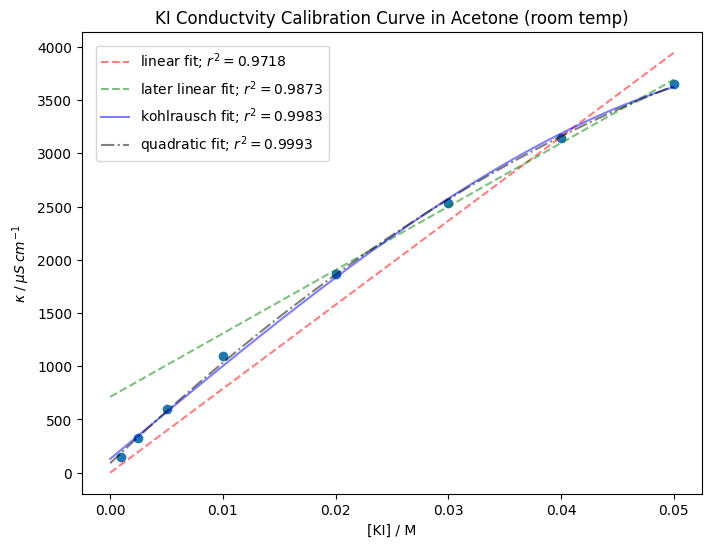

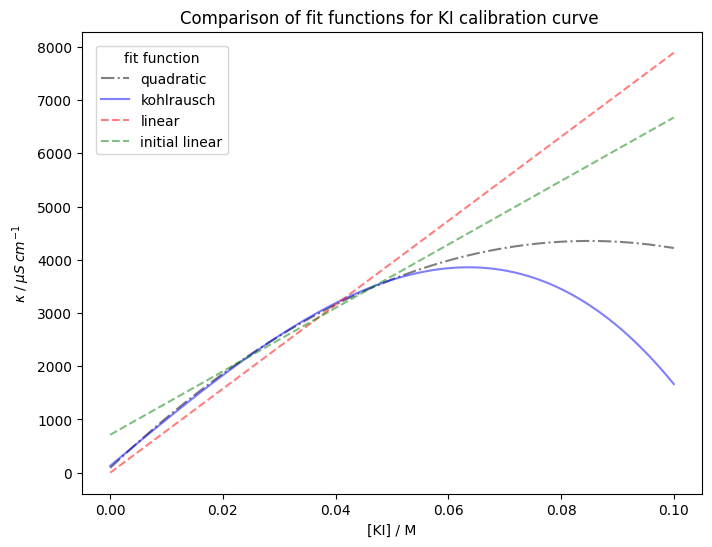

/var/folders/3n/95jg4lk951v3w70mx0z383s00000gn/T/ipykernel_55334/1984184764.py:2: RuntimeWarning: invalid value encountered in sqrt
  return y * ( l_0 - onsager_alpha(l_0,D,T,eta) * np.sqrt(x * y) )


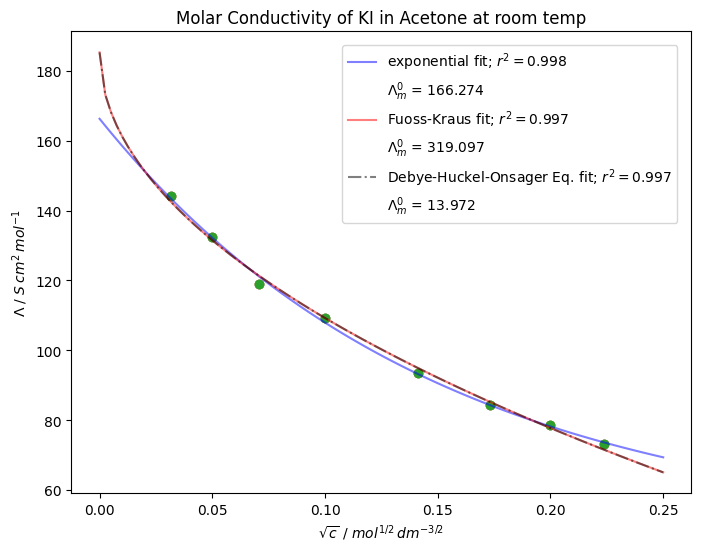

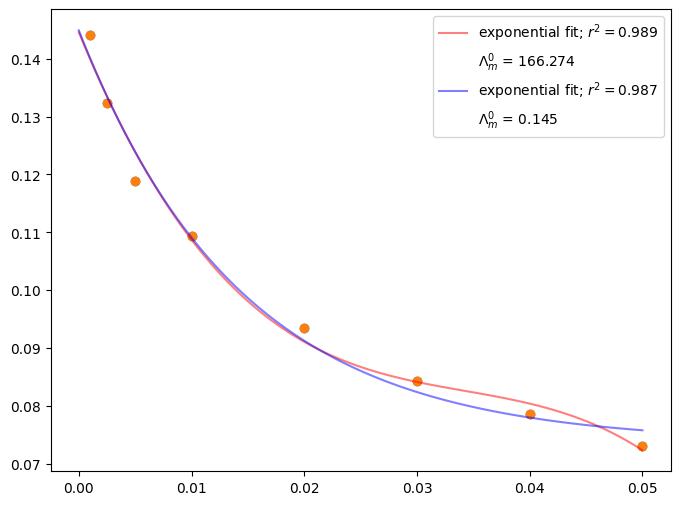

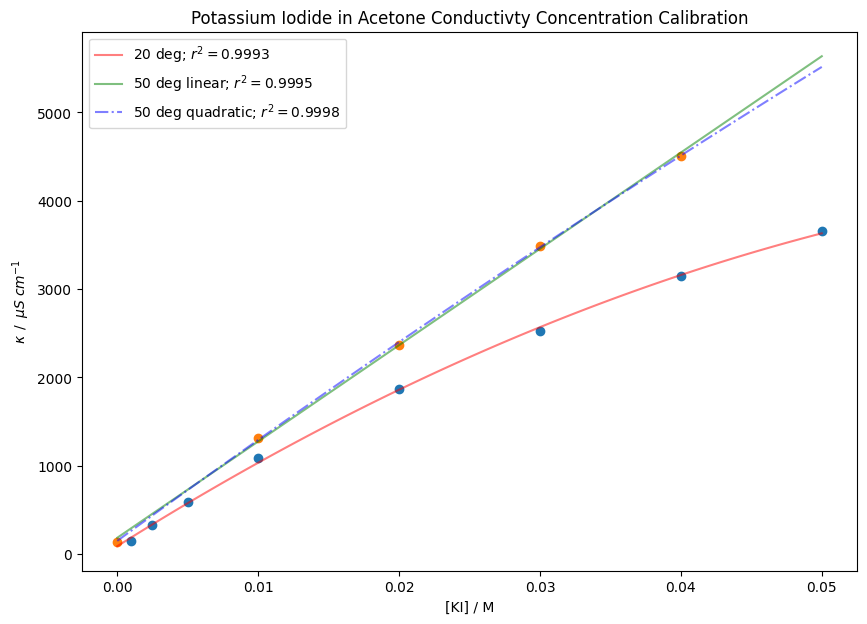

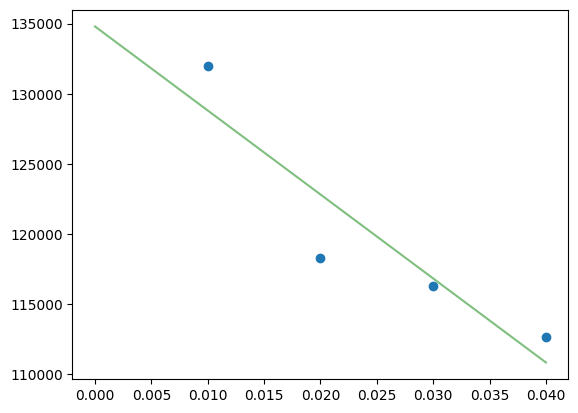

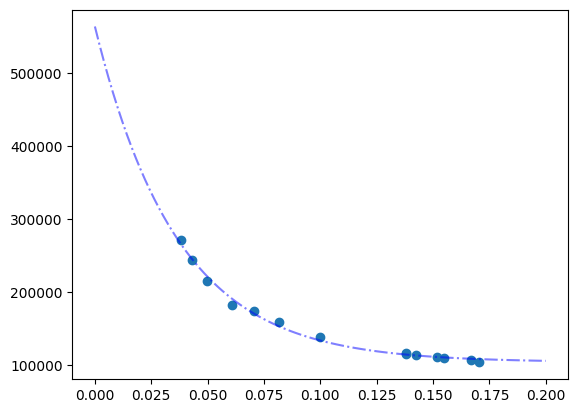

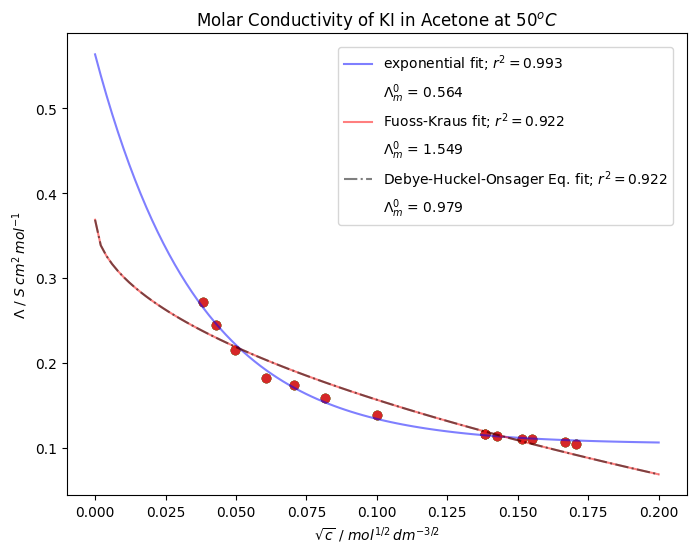

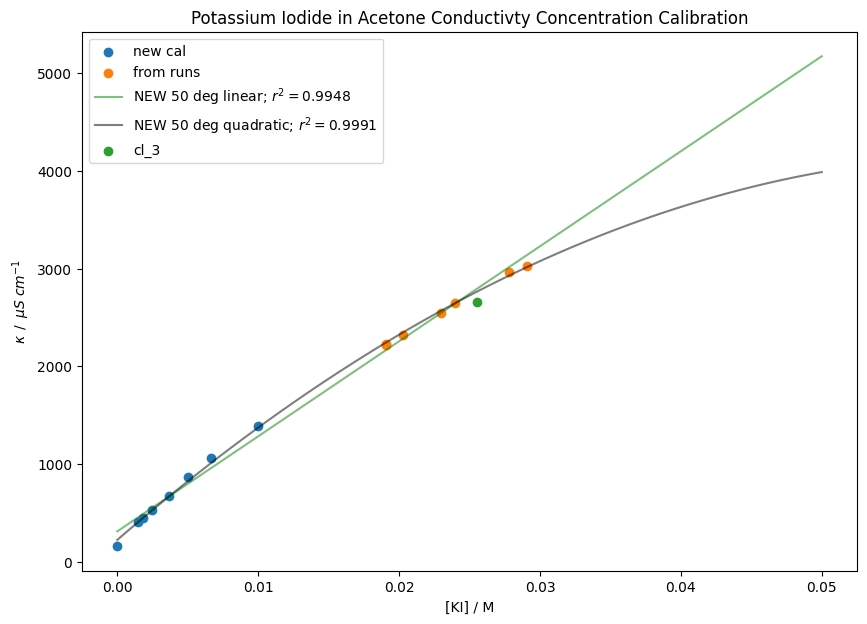

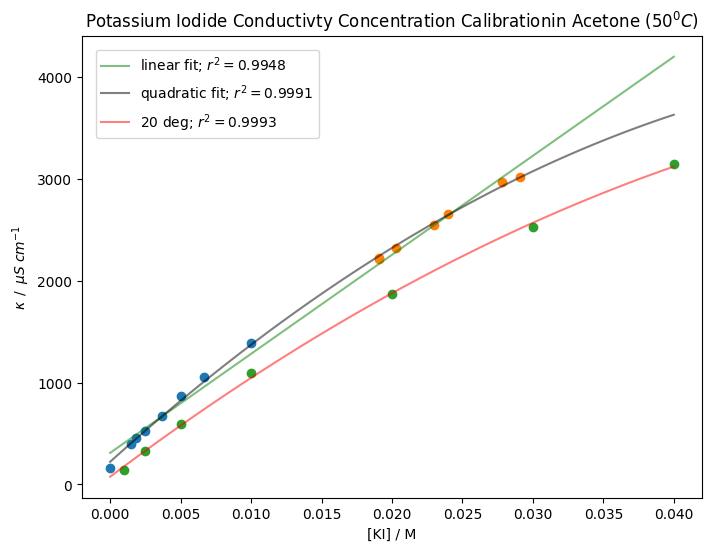

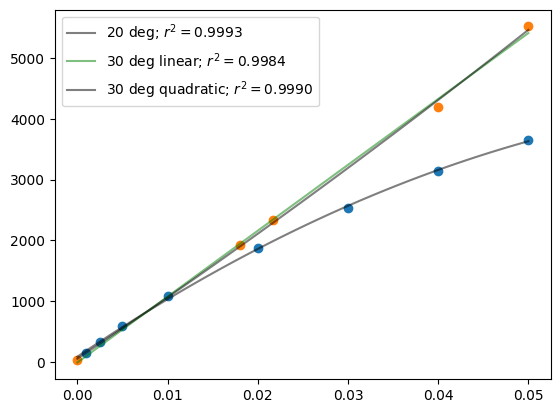

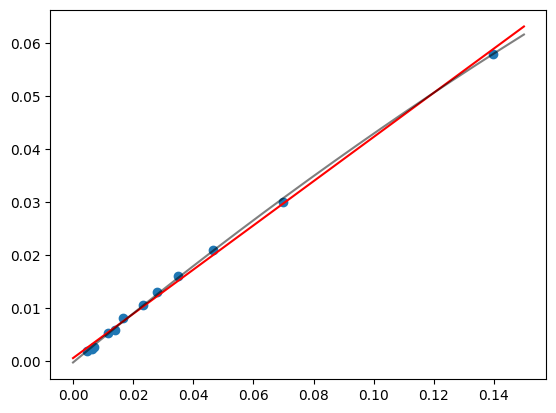

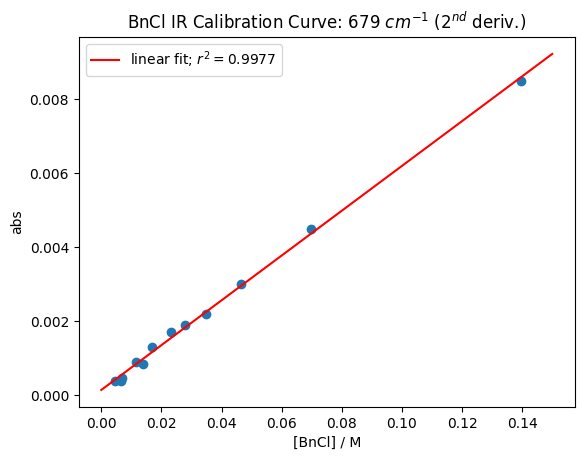

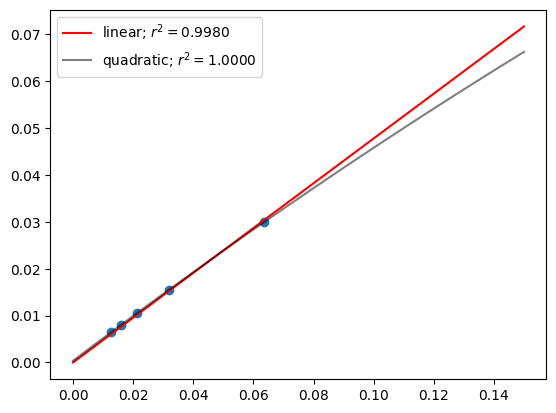

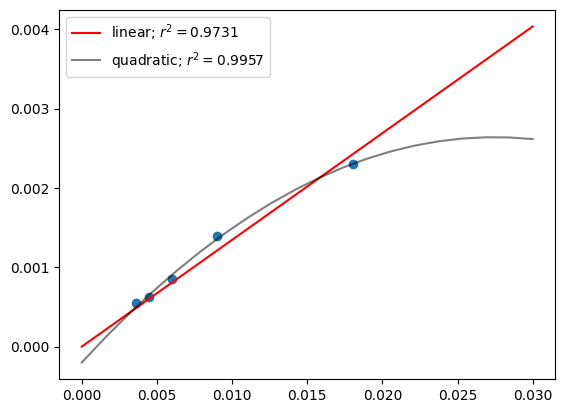

In [58]:
%run acetone_cal.ipynb

In [59]:
def c_second(x,a,b,k):
  return (a - b) * ( 1 / ( 1 - b/a * np.exp( - k * x * (a - b) ) ) - 1 )

In [60]:
def exp(x,b,k):
  return b * np.exp(- k * x)

In [61]:
with open('acetone_50_easy_6.csv') as f:
    reader = csv.reader(f)
    data = list(reader)

In [62]:
data = np.array(data[0]).astype(float)

In [63]:
xs = np.array(range(len(data)))

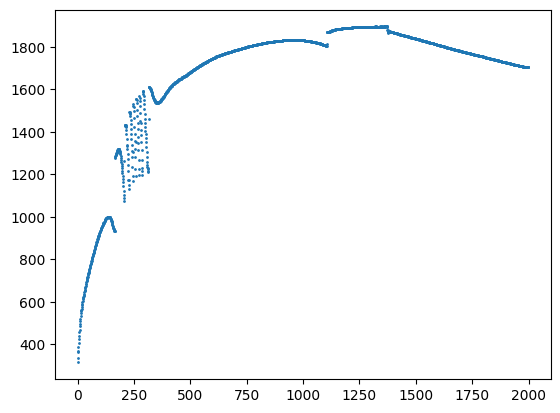

In [64]:
plt.scatter(xs[:2000],data[:2000],s=1,alpha=1,marker='o')
plt.show()

In [65]:
data[1360:1400 ]

array([1896., 1895., 1896., 1895., 1896., 1896., 1896., 1896., 1896.,
       1896., 1896., 1896., 1895., 1895., 1881., 1880., 1872., 1867.,
       1869., 1872., 1873., 1873., 1872., 1873., 1873., 1872., 1872.,
       1871., 1871., 1871., 1870., 1870., 1870., 1869., 1869., 1869.,
       1869., 1869., 1868., 1868.])

[]

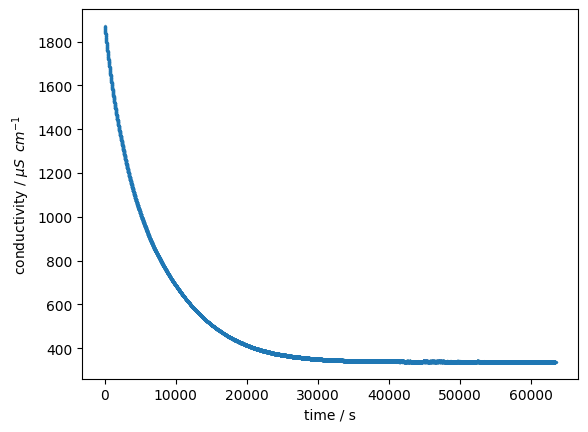

In [66]:
x = xs[1385:] - 1374 # - 60 to set rxn start at 0
y = data[1385:]
plt.scatter(x,y,s=2,alpha=0.1,marker='o')
plt.xlabel('time / s')
plt.ylabel('conductivity / $\mu S \hspace{.5} cm^{-1}$')
plt.plot()

In [67]:
vol = 30
m_bncl = 0.1107
vol += m_bncl / 1.1 # account for volume of BnCl
n_ki = 0.0758 / 166.0028
n_bncl = m_bncl / 126.58
b = 1000 * n_ki / vol
a = 1000 * n_bncl / vol

In [68]:
a

0.02905406155731193

In [69]:
b

0.015169739220922254

In [70]:
og_conc = 1000 * n_ki / 30
og_conc

0.015220626800672439

In [71]:
theo_og_cond = og_conc * m50_i + c50_i

In [72]:
theo_og_cond

1844.1231750629104

In [73]:
data_mod = data * theo_og_cond / data[1360]

In [74]:
data_mod[1360]

1844.1231750629104

In [242]:
a

0.027148868465866165

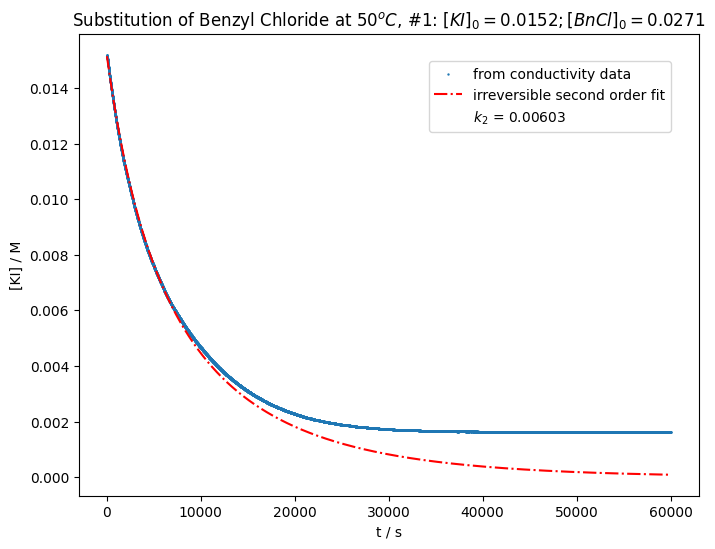

In [244]:
x = xs[1385:] - 1374 # - 60 to set rxn start at 0
#y = np.array( ( data_mod[1385:] - c50_i ) / m50_i )
y = np.array( inv_quad_p(data[1385:],*popt50_i) )

plt.figure(figsize=(8,6))
plt.scatter(x[:60000:5],y[:60000:5],s=.5,alpha=1,marker='o',label='from conductivity data')
popt, pcov = curve_fit( lambda x, k: c_second(x,a,b,k), x[:10000] , y[:10000] , p0=[0.0005])
k2 = popt[0]
plt.plot(x[:60000],c_second(x[:60000],a,b,k2),'r-.',label='irreversible second order fit')


#plt.plot(x,c_second(x,a,b,-m2),'g--')

# Uncomment to add IR data
#plt.scatter(ir_xs[2:int(40000/30)],ki_conc_ir_679[2:int(40000/30)],s=.1,c='green')

#popt_, pcov = curve_fit( lambda x, k: c_second(x,a,b,k), ir_xs[2:int(20000/30)] , ki_conc_ir[2:int(20000/30)] , p0=[0.0005])
#k2_ = popt_[0]
#plt.plot(x[:40000],c_second(x[:40000],a,b,k2_),'y-')

plt.plot([],[],alpha=0,label=f'$k_2$ = {k2:.5f}')

plt.xlabel('t / s')
plt.ylabel('[KI] / M')
plt.title(f'Substitution of Benzyl Chloride at $50^oC$, #1: $[KI]_0 = {b:.4f}; [BnCl]_0 = {a:.4f}$')
plt.legend(borderaxespad=2)

plt.show()

In [76]:
y[0] - y[60000]

0.013569623879241599

In [184]:
(y > y[0]/4).sum()

12362

In [186]:
x[12362]

12373

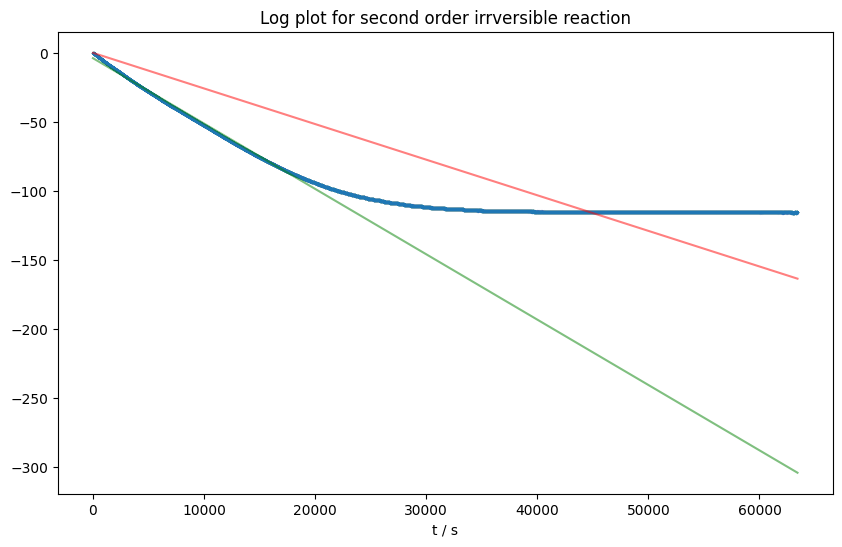

In [77]:
s_y = np.log( a/b * y / ((a - b) + y) ) / (a - b)
plt.figure(figsize=(10,6))
plt.scatter(x,s_y,s=2,alpha=0.05,marker='o')

# straight line fit for whole rxn
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(x.reshape(-1,1),s_y.reshape(-1,1))
m = lin_reg.coef_[0][0]
plt.plot(x,(m*x),'r-',alpha=0.5)

# straight line for start of rxn
lin_reg2 = LinearRegression(fit_intercept=True)
lin_reg2.fit(x[:20000].reshape(-1,1),s_y[:20000].reshape(-1,1))
m2 = lin_reg2.coef_[0][0]
int2 = lin_reg2.intercept_[0]
plt.plot(x,(m2*x + int2),'g-',alpha=0.5)

plt.title('Log plot for second order irrversible reaction')
plt.xlabel('t / s')


plt.show()

In [78]:
m

-0.0025823688495254364

In [79]:
m2

-0.004740526431701272

In [80]:
k2

0.005549641033428239

In [81]:
sparse_x = x[:50000:10]
sparse_y = y[:50000:10]

In [82]:
sparse_df = pd.DataFrame(sparse_y,sparse_x)

In [83]:
sparse_df.to_csv("final_concs/final_conds/ac_50_easy_6.csv", header=False)

In [84]:
IR = pd.read_csv('acetone_50_easy_6_trends.txt',sep="\t")

In [85]:
IR

,DateTime,Peak at 704 cm-1
0,00:00:24.929,0.000676
1,00:00:54.938,0.000755
2,00:01:24.896,0.000551
3,00:01:54.847,0.000496
4,00:02:24.810,0.000666
...,...,...
1716,18:11:31.076,0.008250
1717,18:12:01.123,0.008251
1718,18:12:31.118,0.008184
1719,18:13:00.766,0.008188


In [86]:
ir = IR[IR.columns[1]]

In [87]:
ir = np.array(ir)

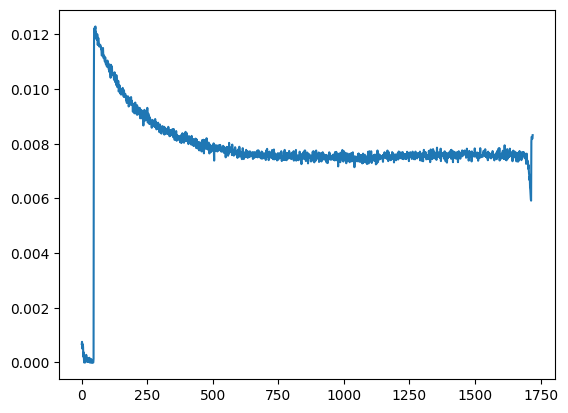

In [88]:
plt.plot(ir)

In [89]:
ir[45:50]

array([0.00013777, 0.00969999, 0.0121714 , 0.01220412, 0.01210458])

In [90]:
ir_clean = ir[45:]

In [91]:
ir_xs = np.array(range(0,len(ir_clean)*30,30))

In [92]:
bncl_conc_ir = (ir_clean - ( slope_bni * a ) - int_) / (slope_ - slope_bni)

In [93]:
slope_

0.4165682728934287

In [94]:
slope_bni

0.13450312572891415

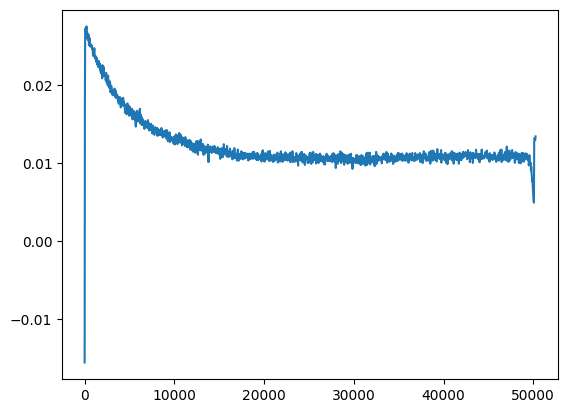

In [95]:
plt.plot(ir_xs,bncl_conc_ir)

In [96]:
a

0.02905406155731193

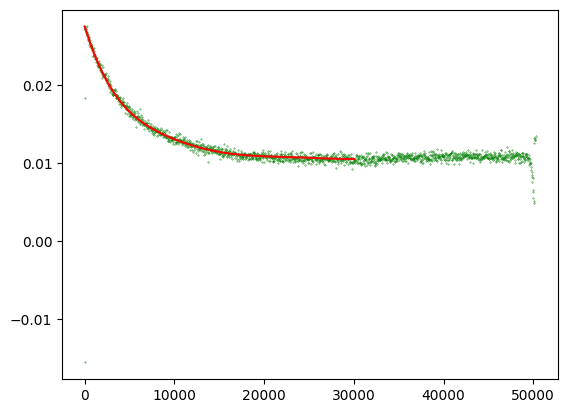

In [97]:
plt.scatter(ir_xs,bncl_conc_ir,s=.1,c='green')

f = np.polyfit(ir_xs[2:30000:5],bncl_conc_ir[2:30000:5],10)
p = np.poly1d(f)
xp = np.linspace(0, 30000, 100)
plt.plot(xp, p(xp), 'r-')

#popt_, pcov = curve_fit( lambda x, k: c_second(x,a,b,k), ir_xs[2:int(20000/30)] , ki_conc_ir[2:int(20000/30)] , p0=[0.0005])
#k2_ = popt_[0]
#plt.plot(x[:40000],c_second(x[:40000],a,b,k2_),'y-')

In [98]:
bncl_conc_ir[2]

0.027131767933547907

In [99]:
# maybe scale ir to starting conc - see later
bncl_conc_ir *= (a - (b - y[60])) / bncl_conc_ir[2]

In [100]:
bncl_conc_ir[2]

0.02891732564769104

In [101]:
bncl_ir_trend = pd.DataFrame(p(xp),xp)

In [102]:
bncl_ir_trend.to_csv("ac_50_easy_6_ir_trend_inc_bni.csv", header=False)

In [103]:
ki_conc_ir = b - (a - bncl_conc_ir)

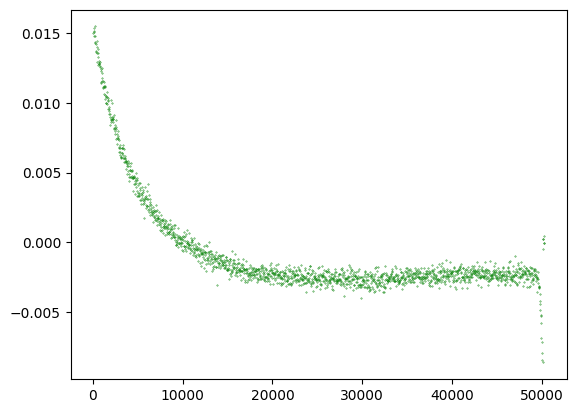

In [104]:
plt.scatter(ir_xs[2:],ki_conc_ir[2:],s=.1,c='green')

In [105]:
ir_df = pd.DataFrame(ir_xs[2:int(40000/30):2],bncl_conc_ir[2:int(40000/30):2])

In [106]:
ir_df.to_csv("ac_50_easy_6_ir_nostretch2.csv", header=False)

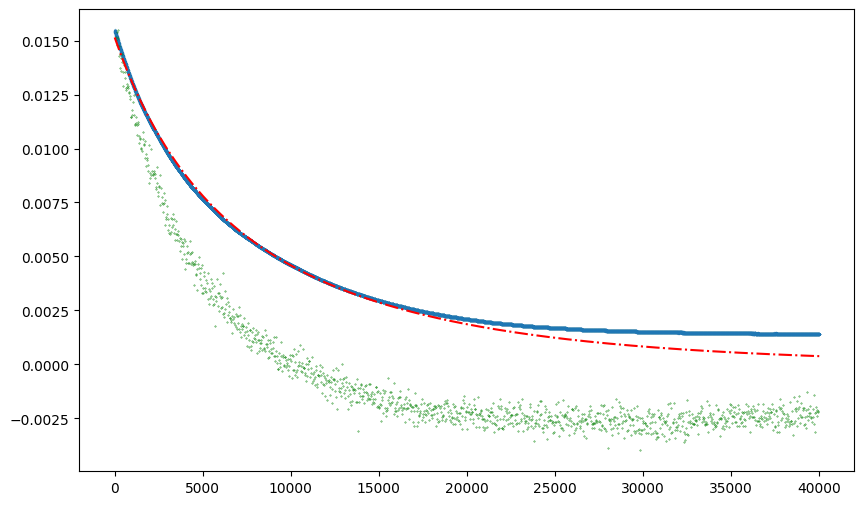

In [107]:
x = xs[1385:] - 1374 # - 60 to set rxn start at 0
y = np.array( ( data[1385:] - c50_i ) / m50_i )
plt.figure(figsize=(10,6))
plt.scatter(x[:40000],y[:40000],s=2,alpha=0.1,marker='o')
popt, pcov = curve_fit( lambda x, k: c_second(x,a,b,k), x[:20000] , y[:20000] , p0=[0.0005])
k2 = popt[0]
plt.plot(x[:40000],c_second(x[:40000],a,b,k2),'r-.')
#plt.plot(x,c_second(x,a,b,-m2),'g--')

# Uncomment to add IR data
plt.scatter(ir_xs[2:int(40000/30)],ki_conc_ir[2:int(40000/30)],s=.1,c='green')

popt_, pcov = curve_fit( lambda x, k: c_second(x,a,b,k), ir_xs[2:int(20000/30)] , ki_conc_ir[2:int(20000/30)] , p0=[0.0005])
k2_ = popt_[0]
#plt.plot(x[:40000],c_second(x[:40000],a,b,k2_),'y-')#

plt.show()

In [108]:
ki_conc_ir = b - (a - bncl_conc_ir)

In [109]:
# lets try some streching!!!
ir_end = np.mean(ki_conc_ir[int(40000/30)-10:int(40000/30)])
ir_spread = ki_conc_ir[2] - ir_end
cond_end = np.mean(y[39990:40000])
cond_spread = y[60] - cond_end
stretch = cond_spread / ir_spread
ki_conc_ir *= stretch

In [110]:
# then shift in line
ir_end = np.mean(ki_conc_ir[int(40000/30)-10:int(40000/30)])
cond_centre = cond_end + cond_spread / 2
ir_centre = ir_end + ir_spread / 2
shift = ir_centre - cond_centre
ki_conc_ir = ki_conc_ir - shift

In [111]:
ki_conc_ir = ki_conc_ir - 0.001

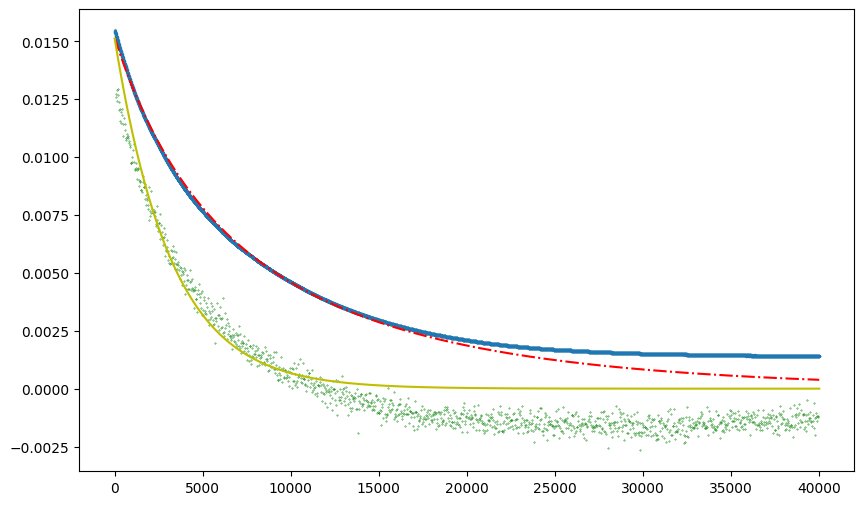

In [112]:
x = xs[1385:] - 1374 # - 60 to set rxn start at 0
y = np.array( ( data[1385:] - c50_i ) / m50_i )
plt.figure(figsize=(10,6))
plt.scatter(x[:40000],y[:40000],s=2,alpha=0.1,marker='o')
popt, pcov = curve_fit( lambda x, k: c_second(x,a,b,k), x[:20000] , y[:20000] , p0=[0.0005])
k2 = popt[0]
plt.plot(x[:40000],c_second(x[:40000],a,b,k2),'r-.')
#plt.plot(x,c_second(x,a,b,-m2),'g--')

# Uncomment to add IR data
plt.scatter(ir_xs[2:int(40000/30)],ki_conc_ir[2:int(40000/30)],s=.1,c='green')

popt_, pcov = curve_fit( lambda x, k: exp(x,b,k), ir_xs[2:int(20000/30)] , ki_conc_ir[2:int(20000/30)] , p0=[0.0005])
k2_ = popt_[0]
plt.plot(x[:40000],exp(x[:40000],b,k2_),'y-')#


plt.show()

In [113]:
### LETS DO IT WITH A DIFFERENT PEAK :)

In [114]:
IR_679 = pd.read_csv('ac_50_easy_6_679_2deriv.txt',sep="\t")

In [115]:
ir_679 = IR_679[IR_679.columns[1]]

In [116]:
ir_679 = np.array(ir_679)

Text(0.5, 1.0, 'Acetone_50_Easy_6')

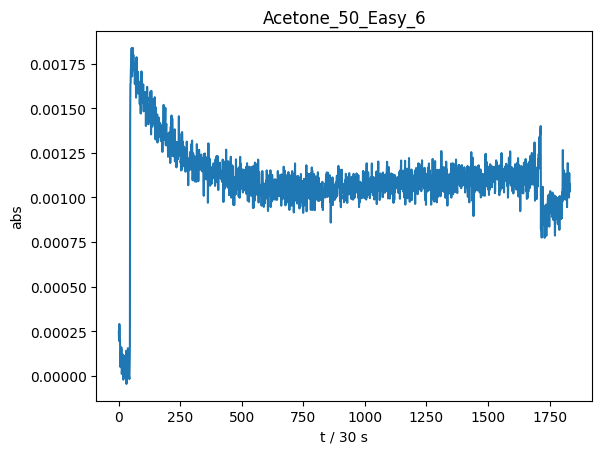

In [117]:
plt.plot(ir_679)
plt.xlabel('t / 30 s')
plt.ylabel('abs')
plt.title('Acetone_50_Easy_6')

In [118]:
ir_clean_679 = ir_679[45:]

In [119]:
ir_xs = np.array(range(0,len(ir_clean_679)*30,30))

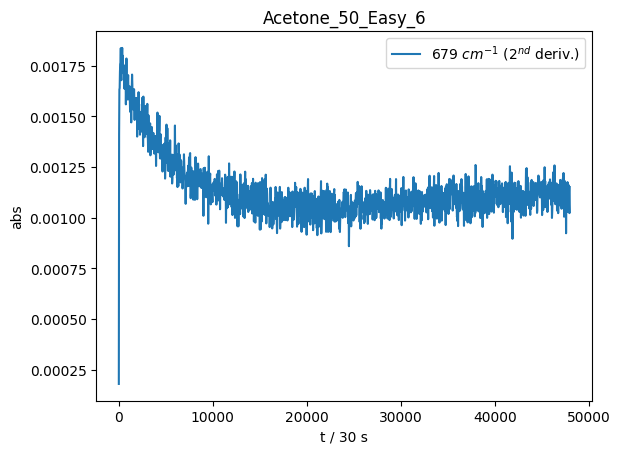

In [120]:
plt.plot(ir_xs[:int(48000/30)],ir_clean_679[:int(48000/30)], label = '679 $cm^{-1}$ ($2^{nd}$ deriv.)')
plt.xlabel('t / 30 s')
plt.ylabel('abs')
plt.title('Acetone_50_Easy_6')
plt.legend()
plt.show()

In [208]:
bncl_conc_ir_679 = (ir_clean_679 - int_679) / slope_679

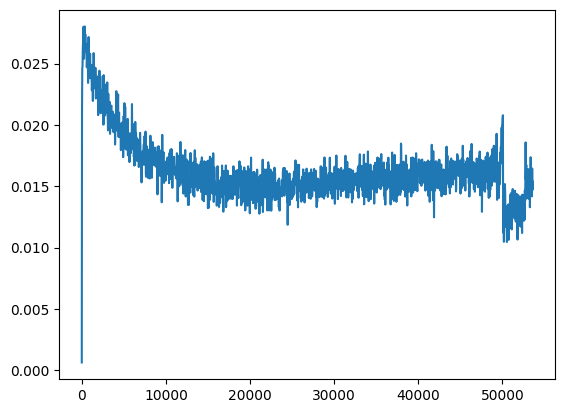

In [209]:
plt.plot(ir_xs,bncl_conc_ir_679)

In [210]:
a

0.027148868465866165

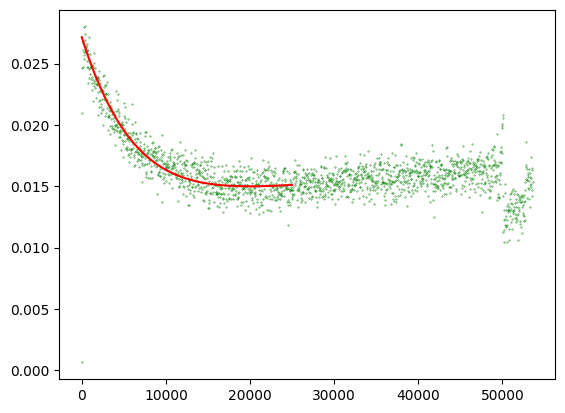

In [211]:
plt.scatter(ir_xs,bncl_conc_ir_679,s=.1,c='green')

f = np.polyfit(ir_xs[2:25000:5],bncl_conc_ir_679[2:25000:5],6)
p = np.poly1d(f)
xp = np.linspace(0, 25000, 100)
plt.plot(xp, p(xp), 'r-')

#popt_, pcov = curve_fit( lambda x, k: c_second(x,a,b,k), ir_xs[2:int(20000/30)] , ki_conc_ir[2:int(20000/30)] , p0=[0.0005])
#k2_ = popt_[0]
#plt.plot(x[:40000],c_second(x[:40000],a,b,k2_),'y-')

In [212]:
p(0)

0.027148868465866165

In [213]:
a = p(0)

In [203]:
bncl_conc_ir_679[4]

0.026073474726869418

In [204]:
# maybe scale ir to starting conc - see later
### STRETCH
#bncl_conc_ir_679 *= (a - (b - y[360])) / bncl_conc_ir_679[6]
### TRANS
#bncl_conc_ir_679 += ((a - (b - y[120])) - bncl_conc_ir_679[4])

In [205]:
bncl_conc_ir_679[4]

0.028763850518134324

In [206]:
bncl_ir_trend = pd.DataFrame(p(xp),xp)

In [129]:
bncl_ir_trend.to_csv("ac_50_easy_6_ir_679_trans.csv", header=False)

In [214]:
ki_conc_ir_679 = b - (a - bncl_conc_ir_679)

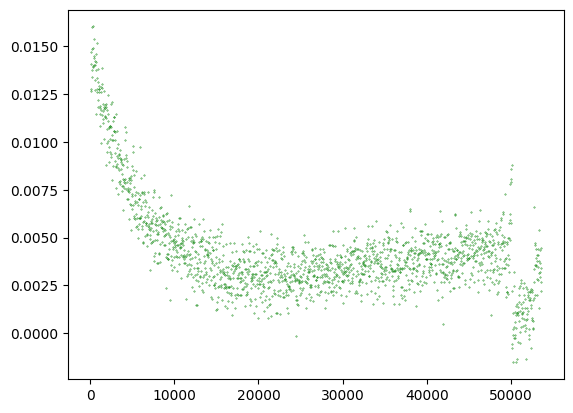

In [215]:
plt.scatter(ir_xs[2:],ki_conc_ir_679[2:],s=.1,c='green')

In [132]:
ir_df = pd.DataFrame(ir_xs[2:int(40000/30):2],bncl_conc_ir[2:int(40000/30):2])

In [133]:
ir_df.to_csv("ac_50_easy_6_ir_nostretch2.csv", header=False)

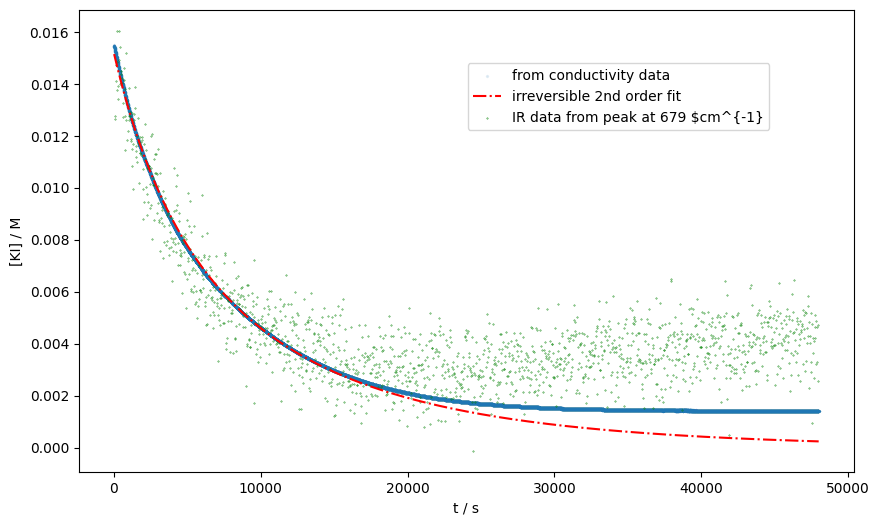

In [216]:
x = xs[1385:] - 1374 # - 60 to set rxn start at 0
y = np.array( ( data[1385:] - c50_i ) / m50_i )
plt.figure(figsize=(10,6))
plt.scatter(x[:48000],y[:48000],s=2,alpha=0.1,marker='o',label='from conductivity data')
popt, pcov = curve_fit( lambda x, k: c_second(x,a,b,k), x[:20000] , y[:20000] , p0=[0.0005])
k2 = popt[0]
plt.plot(x[:48000],c_second(x[:48000],a,b,k2),'r-.',label='irreversible 2nd order fit')
#plt.plot(x,c_second(x,a,b,-m2),'g--')

# Uncomment to add IR data
plt.scatter(ir_xs[2:int(48000/30)],ki_conc_ir_679[2:int(48000/30)],s=.1,c='green',label='IR data from peak at 679 $cm^{-1}')

#popt_, pcov = curve_fit( lambda x, k: c_second(x,a,b,k), ir_xs[2:int(20000/30)] , ki_conc_ir[2:int(20000/30)] , p0=[0.0005])
#k2_ = popt_[0]
#plt.plot(x[:40000],c_second(x[:40000],a,b,k2_),'y-')#

plt.xlabel('t / s')
plt.ylabel('[KI] / M')
plt.legend(loc=1,bbox_to_anchor=(.9,.9))

plt.show()

Think this is obsolete tbh - till next file open

In [136]:
# lets try some streching!!!
ir_end = np.mean(ki_conc_ir[int(40000/30)-10:int(40000/30)])
ir_spread = ki_conc_ir[2] - ir_end
cond_end = np.mean(y[39990:40000])
cond_spread = y[60] - cond_end
stretch = cond_spread / ir_spread
ki_conc_ir *= stretch

In [137]:
# then shift in line
ir_end = np.mean(ki_conc_ir[int(40000/30)-10:int(40000/30)])
cond_centre = cond_end + cond_spread / 2
ir_centre = ir_end + ir_spread / 2
shift = ir_centre - cond_centre
ki_conc_ir = ki_conc_ir - shift

In [138]:
ki_conc_ir = ki_conc_ir - 0.001

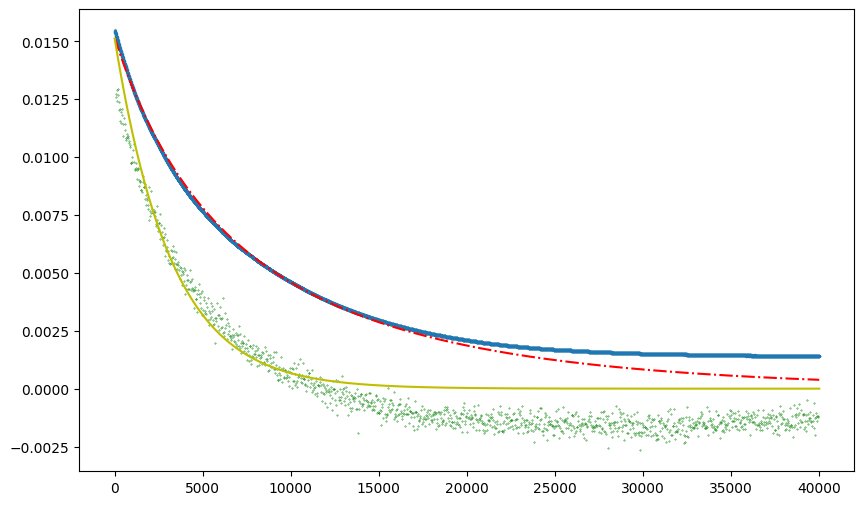

In [139]:
x = xs[1385:] - 1374 # - 60 to set rxn start at 0
y = np.array( ( data[1385:] - c50_i ) / m50_i )
plt.figure(figsize=(10,6))
plt.scatter(x[:40000],y[:40000],s=2,alpha=0.1,marker='o')
popt, pcov = curve_fit( lambda x, k: c_second(x,a,b,k), x[:20000] , y[:20000] , p0=[0.0005])
k2 = popt[0]
plt.plot(x[:40000],c_second(x[:40000],a,b,k2),'r-.')
#plt.plot(x,c_second(x,a,b,-m2),'g--')

# Uncomment to add IR data
plt.scatter(ir_xs[2:int(40000/30)],ki_conc_ir[2:int(40000/30)],s=.1,c='green')

popt_, pcov = curve_fit( lambda x, k: exp(x,b,k), ir_xs[2:int(20000/30)] , ki_conc_ir[2:int(20000/30)] , p0=[0.0005])
k2_ = popt_[0]
plt.plot(x[:40000],exp(x[:40000],b,k2_),'y-')#


plt.show()

In [140]:
IR_full[IR_full.columns[1:4]][45:1500].plot()

NameError: name 'IR_full' is not defined

In [141]:
ir_full = np.array(IR_full[IR_full.columns[1:4]])

NameError: name 'IR_full' is not defined

In [142]:
ir_full.shape

NameError: name 'ir_full' is not defined

In [143]:
ir_full_clean = ir_full[45:]

NameError: name 'ir_full' is not defined

In [144]:
len(ir_full_clean)

NameError: name 'ir_full_clean' is not defined

In [145]:
ir_xs = np.array(range(0,len(ir_full_clean)*30,30))

NameError: name 'ir_full_clean' is not defined

In [146]:
ir_xs

array([    0,    30,    60, ..., 53550, 53580, 53610])

In [147]:
ir_704 = ir_full_clean[:,0]
ir_762 = ir_full_clean[:,1]
ir_1714 = ir_full_clean[:,2]

NameError: name 'ir_full_clean' is not defined

In [148]:
# lets try some streching!!!
end1 = np.mean(ir_704[int(40000/30)-10:int(40000/30)])
spread1 = ir_704[2] - end1
end2 = np.mean(ir_1714[int(40000/30)-10:int(40000/30)])
spread2 = ir_1714[2] - end2
stretch = spread1 / spread2

NameError: name 'ir_704' is not defined

In [149]:
ir_1714_mod = ir_1714 * stretch

NameError: name 'ir_1714' is not defined

In [150]:
# then shift in line
ir_1714_mod -= ir_1714_mod[2] - ir_704[2]

NameError: name 'ir_1714_mod' is not defined

In [151]:
# lets try some MORE streching!!!
end1 = np.mean(ir_704[int(40000/30)-10:int(40000/30)])
spread1 = ir_704[2] - end1
end2 = np.mean(ir_762[int(40000/30)-10:int(40000/30)])
spread2 = ir_762[2] - end2
stretch = spread1 / spread2

NameError: name 'ir_704' is not defined

In [152]:
ir_762_mod = ir_762 * stretch

NameError: name 'ir_762' is not defined

In [153]:
# then shift in line
ir_762_mod -= ir_762_mod[2] - ir_704[2]

NameError: name 'ir_762_mod' is not defined

In [154]:
plt.figure(figsize=(10,7))
plt.scatter(ir_xs[2:1500:5],ir_704[2:1500:5],s=.1,label='704 $cm^{-1}$')
plt.scatter(ir_xs[3:1500:5],ir_1714_mod[3:1500:5],s=.1,label='1714 $cm^{-1}$')
plt.scatter(ir_xs[4:1500:5],ir_762_mod[4:1500:5],s=.1,label='762 $cm^{-1}$')
plt.legend()
plt.show()

NameError: name 'ir_704' is not defined

<Figure size 1000x700 with 0 Axes>

In [155]:
# how similar are these lines..?
y_ = ir_704/ir_1714_mod
plt.scatter(ir_xs,y_,s=.1)
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(ir_xs.reshape(-1,1),y_)
plt.plot(ir_xs,ir_xs*lin_reg.coef_ + lin_reg.intercept_,'r-')

NameError: name 'ir_704' is not defined

In [217]:
IR_new = pd.read_csv('easy6_new.txt',sep="\t")

In [218]:
IR_new

,DateTime,Peak at 704 cm-1,Peak at 762 cm-1,Peak at 1714 cm-1,Peak at 1720 cm-1,Peak at 1354 cm-1,Peak at 1720 cm-1 1,Events
0,00:00:24.929,0.001116,-0.002468,-1.110223e-16,0.011296,1.438174,-0.000487,NaN
1,00:00:54.938,0.001257,-0.002439,-5.551115e-17,0.010079,1.372032,-0.000582,NaN
2,00:01:24.896,0.000954,-0.002188,-1.665335e-16,0.009534,1.247605,-0.000503,NaN
3,00:01:54.847,0.000954,-0.001849,0.000000e+00,0.007757,1.012222,-0.000445,NaN
4,00:02:24.810,0.000582,-0.000898,-5.551115e-17,0.005423,0.742497,-0.000213,NaN
...,...,...,...,...,...,...,...,...
1828,19:09:31.278,0.010568,0.002370,8.054604e-03,0.007454,-0.006088,0.009030,NaN
1829,19:10:01.296,0.010657,0.002395,8.958675e-03,0.008213,0.002892,0.010313,NaN
1830,19:10:31.269,0.010935,0.002420,8.703058e-03,0.007791,-0.007900,0.009848,NaN
1831,19:11:01.192,0.010982,0.002534,7.355342e-03,0.006709,-0.004133,0.008509,NaN


In [219]:
IR_new[IR_new.columns[5]] = IR_new[IR_new.columns[5]] * -1

Text(0.5, 1.0, 'Auto Trend Picking')

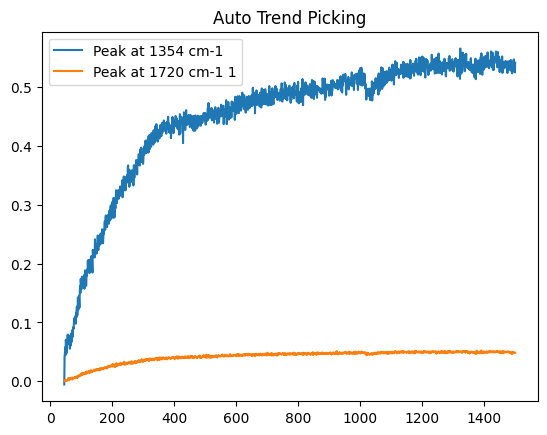

In [220]:
IR_new[IR_new.columns[5:7]][45:1500].plot()
plt.title('Auto Trend Picking')

In [224]:
ir_new = np.array(IR_new[IR_new.columns[5:7]])

In [225]:
ir_new.shape

(1833, 2)

In [226]:
ir_new_clean = ir_new[45:]

In [227]:
len(ir_new_clean)

1788

In [228]:
ir_xs = np.array(range(0,len(ir_new_clean)*30,30))

In [229]:
ir_xs

array([    0,    30,    60, ..., 53550, 53580, 53610])

In [230]:
ir_new_1374 = ir_new_clean[:,0]
ir_new_1720 = ir_new_clean[:,1]

In [231]:
# lets try some streching!!!
ir_end = np.mean(ir_new_1720[int(40000/30)-10:int(40000/30)])
ir_spread = ir_end - 0
cond_end = np.mean(y[39990:40000])
cond_spread = y[0] - cond_end
stretch = cond_spread / ir_spread
ir_new_1720 *= -stretch
ir_new_1720 = ir_new_1720 + y[0] - ir_new_1720[0]

In [232]:
# lets try some streching!!!
ir_end = np.mean(ir_new_1374[int(40000/30)-10:int(40000/30)])
ir_spread = ir_end - 0
cond_end = np.mean(y[39990:40000])
cond_spread = y[0] - cond_end
stretch = cond_spread / ir_spread
ir_new_1374 *= -stretch
ir_new_1374 = ir_new_1374 + y[0] - ir_new_1374[0]

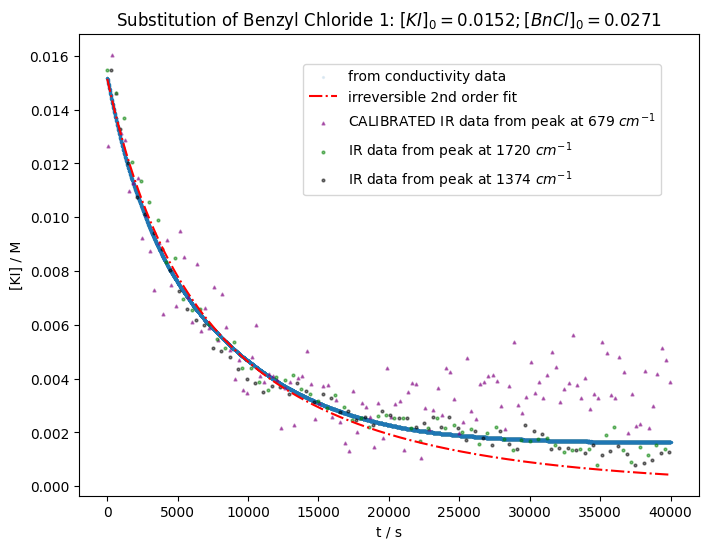

In [233]:
x = xs[1385:] - 1374 # - 60 to set rxn start at 0
#y = np.array( ( data[1385:] - c50_i ) / m50_i )
y = np.array( inv_quad_p(data[1385:],*popt50_i) )
plt.figure(figsize=(8,6))
plt.scatter(x[:40000],y[:40000],s=2,alpha=0.1,marker='o',label='from conductivity data')
popt, pcov = curve_fit( lambda x, k: c_second(x,a,b,k), x[:20000] , y[:20000] , p0=[0.0005])
k2 = popt[0]
plt.plot(x[:40000],c_second(x[:40000],a,b,k2),'r-.',label='irreversible 2nd order fit')
#plt.plot(x,c_second(x,a,b,-m2),'g--')

# Uncomment to add IR data
plt.scatter(ir_xs[2:int(40000/30):10],ki_conc_ir_679[2:int(40000/30):10],s=4,alpha=.5,marker='^',c='purple',label='CALIBRATED IR data from peak at 679 $cm^{-1}$')

plt.scatter(ir_xs[:int(40000/30):20],ir_new_1720[:int(40000/30):20],s=4,alpha=.5,c='green',label='IR data from peak at 1720 $cm^{-1}$')

plt.scatter(ir_xs[10:int(40000/30):20],ir_new_1374[:int(40000/30):20],s=4,alpha=.5,c='black',label='IR data from peak at 1374 $cm^{-1}$')

#plt.scatter(ir_xs[2:int(40000/30)],ir_704[2:int(40000/30)],s=.1,c='blue')

plt.xlabel('t / s')
plt.ylabel('[KI] / M')
plt.title(f'Substitution of Benzyl Chloride 1: $[KI]_0 = {b:.4f}; [BnCl]_0 = {a:.4f}$')
plt.legend(loc=1,bbox_to_anchor=(.95,.95))

plt.show()

In [234]:
bni_cal = pd.read_csv('bni_cal_1720.txt',sep="\t")

In [235]:
bni_cal = np.array(bni_cal[bni_cal.columns[1]])

Text(0.5, 0, 'abs')

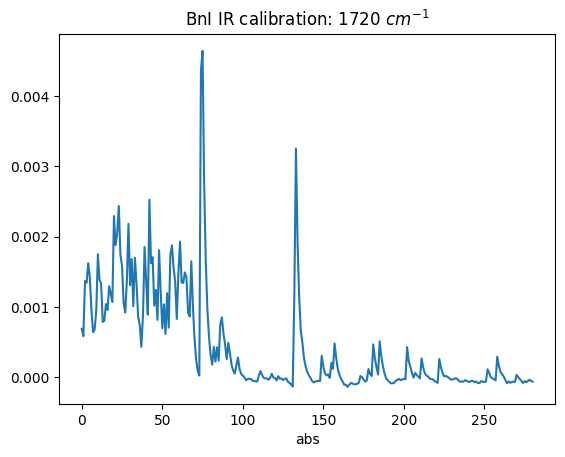

In [236]:
plt.plot(bni_cal[50:])
plt.title('BnI IR calibration: 1720 $cm^{-1}$')
plt.xlabel('abs')

In [237]:
np.mean(bni_cal[50:100])

0.0013062309874082962

In [238]:
np.mean(bni_cal[150:175])

-1.4626202331857273e-05

In [239]:
# are the 1720 & 1374 peaks the same trend..?
end1 = np.mean(ir_new_1720[int(40000/30)-10:int(40000/30)])
spread1 = ir_new_1720[0] - end1
end2 = np.mean(ir_new_1374[int(40000/30)-10:int(40000/30)])
spread2 = ir_new_1374[0] - end2
stretch = spread1 / spread2
ir_new_1374_mod = ir_new_1374 * stretch

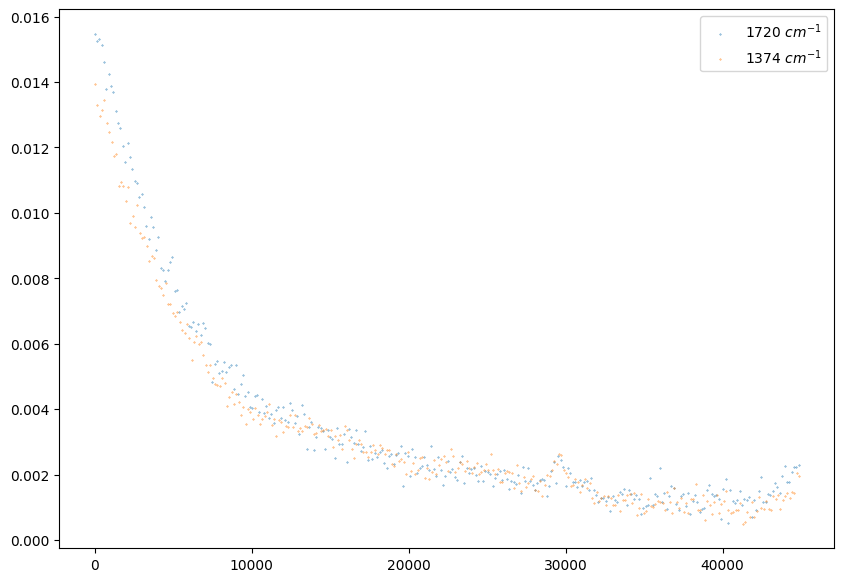

In [240]:
plt.figure(figsize=(10,7))
plt.scatter(ir_xs[:1500:5],ir_new_1720[:1500:5],s=.1,label='1720 $cm^{-1}$')
plt.scatter(ir_xs[1:1500:5],ir_new_1374_mod[1:1500:5],s=.1,label='1374 $cm^{-1}$')
plt.legend()
plt.show()

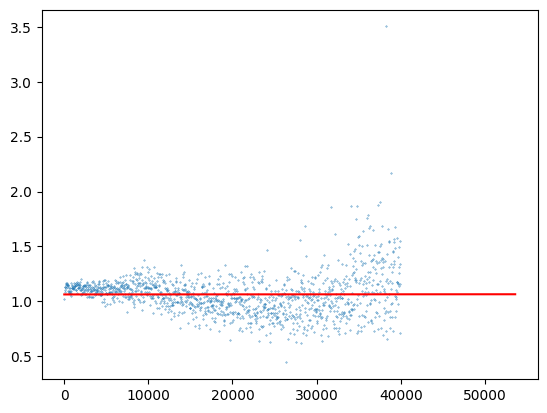

In [241]:
# how similar are these lines..?
y_ = ir_new_1720/ir_new_1374_mod
plt.scatter(ir_xs[:int(40000/30)],y_[:int(40000/30)],s=.1)
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(ir_xs[:int(40000/30)].reshape(-1,1),y_[:int(40000/30)])
plt.plot(ir_xs,ir_xs*lin_reg.coef_ + lin_reg.intercept_,'r-')

In [182]:
cond_end = np.mean(y[39990:40000])
b - cond_end

0.013530602266698392